Importing Dependencies

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Creating the DataFrame

In [16]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [17]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
df.shape

(25, 2)

<Axes: xlabel='Hours', ylabel='Scores'>

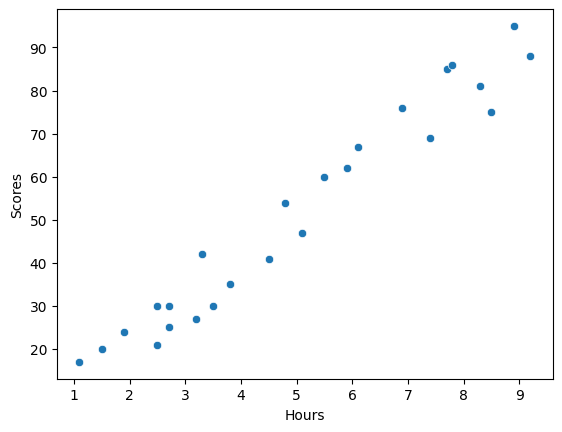

In [19]:
sns.scatterplot(data=df,x=df['Hours'],y=df['Scores'])

In [20]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

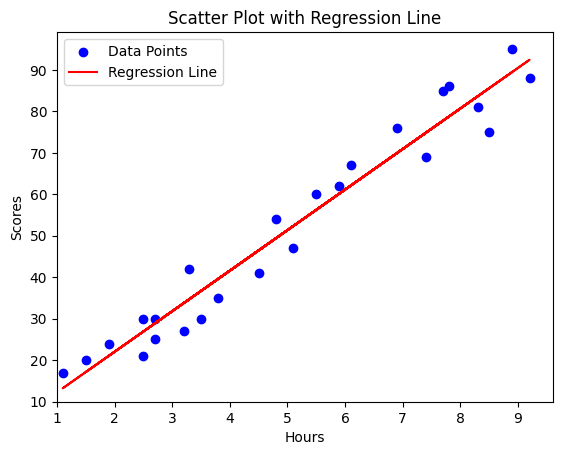

In [23]:
# Perform linear regression
coefficients = np.polyfit(X.flatten(), y, 1)
poly_line = np.poly1d(coefficients)

# Create scatter plot and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, poly_line(X), color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scatter Plot with Regression Line')
plt.xlim(1)
plt.ylim(10)

# Add legend
plt.legend()

# Display the plot
plt.show()

In [24]:
print(X_test)

predictions = model.predict(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [27]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Hours': X_test.flatten(), 'Actual': y_test, 'Predicted': predictions})  
df 

,Hours,Actual,Predicted
0,8.3,81,83.188141
1,2.5,30,27.032088
2,2.5,21,27.032088
3,6.9,76,69.633232
4,5.9,62,59.951153


### **Evaluating the Model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 3.9207511902099244
Mean Squared Error (MSE): 18.943211722315272
Root Mean Squared Error (RMSE): 4.352380006653288
R-squared (R2) Score: 0.9678055545167994


### Model Prediction

In [54]:
# You can also test with your own data
hours = np.array(10.036399).reshape(1,-1)
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = [[10.036399]]
Predicted Score = [100.00009186]
